In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#### 通常对于决策边界不唯一的问题称之为不适定问题，逻辑回归解决不适用问题的思路是：引入sigmod函数，根据此概率函数进行建模，形成损失函数，最小化损失函数找到决策边界。支撑向量机解决不适定问题的思路：最大化两侧支撑向量向量之间的距离（margin），将求解决策边界转化成最优化问题！

### 关于svm有几点需要注意：
- 使用soft-margin-SVM时候引入正则化，L1 L2正则
- 使用拉普拉斯算子将有条件的优化问题转化为全局最优化问题。
- svm的数学化简技巧。
- 进行svm训练的数据必须进行标准化处理，涉及距离的计算。


在进行拉普拉斯算子转换前的 soft margin SVM 可以表示为以下形式：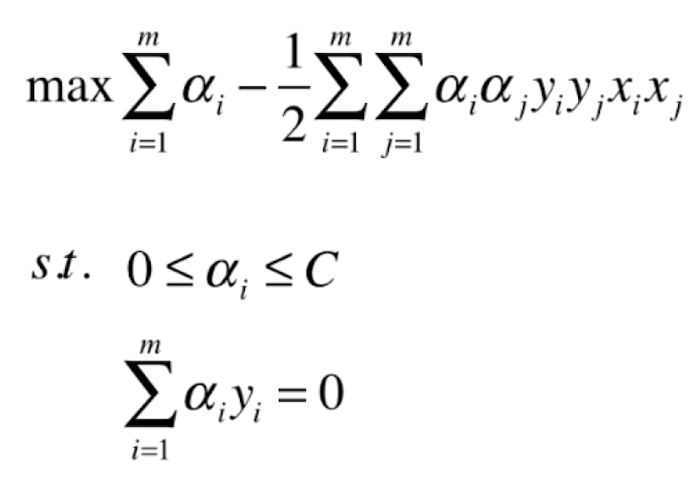
### --------------------------------------------------------------------------------------------------------------------
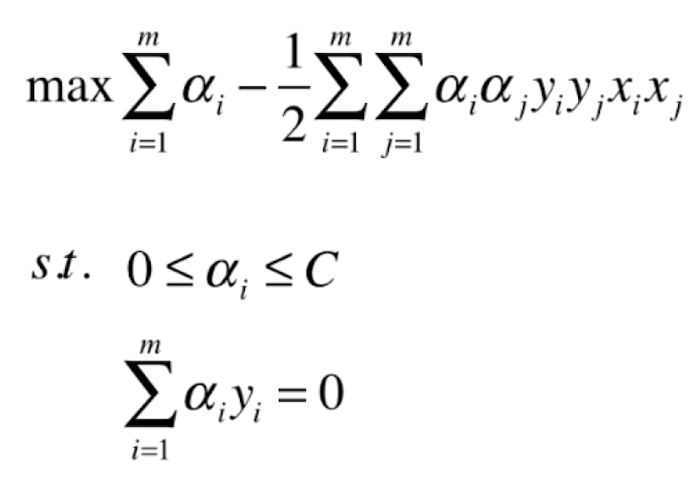

note：在正则化系数取C越大越倾向于hard margin svm，所以可以通过调节C的大小达到hard/soft的效果。

### 使用scikit-learn中的SVM算法

In [2]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

In [3]:
iris_data=load_iris()

In [4]:
X=iris_data.data
y=iris_data.target
print X.shape,y.shape

(150L, 4L) (150L,)


In [5]:
#### 从二分类问题入手方便数据可视化。选择数据的前两个特征
X=X[y<2,:2]
y=y[y<2]
print X.shape
print y.shape

(100L, 2L)
(100L,)


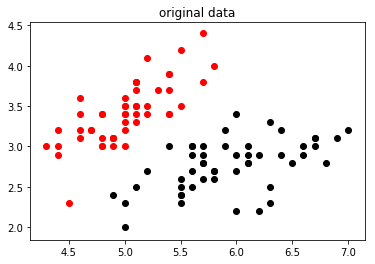

In [6]:
plt.scatter(X[y==0,0],X[y==0,1],color='red')
plt.scatter(X[y==1,0],X[y==1,1],color='black')
plt.title("original data")
plt.show()

In [7]:
# 进行数据的标准化
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
standardScaler.fit(X)
X_standard=standardScaler.transform(X)

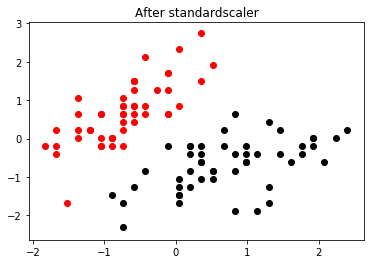

In [8]:
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='black')
plt.title('After standardscaler')
plt.show()

### 使用线性SVC分类器进行训练

In [9]:
#C：表示正则化比列，C越大越倾向于hard margin svm!!
svc_classifier=LinearSVC(C=1e9)
svc_classifier.fit(X_standard,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
### 该函数用于绘制决策边界
def plot_decision_boundary(model, axis):
    """绘制决策边界"""
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


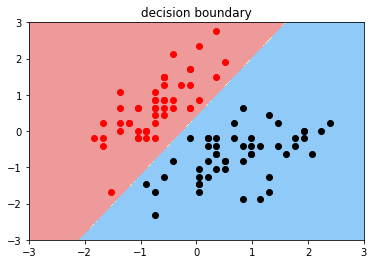

In [11]:
plot_decision_boundary(svc_classifier,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='black')
plt.title('decision boundary')
plt.show()

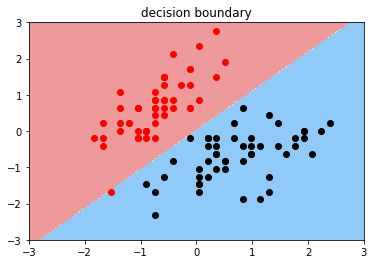

In [12]:
### 调整正则比比列参数，观察决策边界的变化
svc_classifier_2=LinearSVC(C=0.01)
svc_classifier_2.fit(X_standard,y)
plot_decision_boundary(svc_classifier_2,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='black')
plt.title('decision boundary')
plt.show()

In [13]:
# 参数和截距
print svc_classifier_2.coef_,svc_classifier_2.intercept_

[[ 0.44053087 -0.40861635]] [ 0.00580472]


In [14]:
#### 以下内容为绘制决定margin的上下直线
def plot_decision_boundary_up_down(model, axis):
    
    
    #决策边界为：
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    ## 上线的直线分别为：
    # w0*x0 + w1*x1 + b = 1     w0*x0 + w1*x1 + b = -1
    # ======> x1=1/w1-b/w1-w0x0/w1    x1=-1/w1-b/w1-w0x0/w1
    
    coef=model.coef_[0]
    intercept=model.intercept_[0]
    w=coef
    b=intercept
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='blue')
    plt.plot(plot_x[down_index], down_y[down_index], color='blue')
    

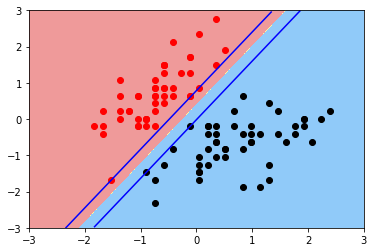

In [15]:
plot_decision_boundary(svc_classifier,axis=[-3,3,-3,3])
plot_decision_boundary_up_down(svc_classifier,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='black')
plt.show()

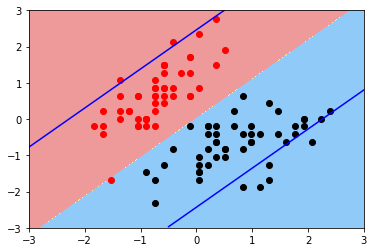

In [16]:
plot_decision_boundary(svc_classifier_2,axis=[-3,3,-3,3])
plot_decision_boundary_up_down(svc_classifier_2,axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0],X_standard[y==0,1],color='red')
plt.scatter(X_standard[y==1,0],X_standard[y==1,1],color='black')
plt.show()

### 使用SVM处理非线性的问题，核函数的使用，将特征向量映射到更高维的空间中解决线性不可分的问题

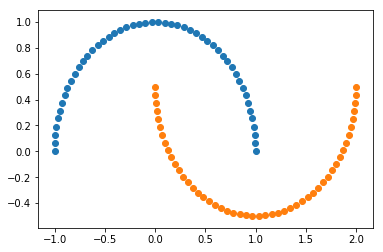

In [17]:
# 使用sklearn.dateset 生成样本数据
from sklearn import datasets
X,y=datasets.make_moons()
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

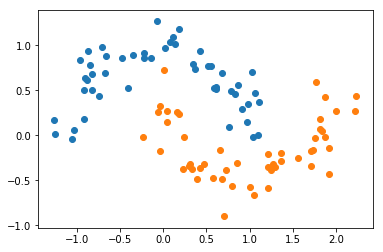

In [18]:
### 为样本数据添加噪声
X,y=datasets.make_moons(noise=0.15,random_state=1)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [19]:
# 使用多项式特征
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

svc_poly=Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('standard',StandardScaler()),
    ('svc',LinearSVC(C=1.0))    
])
svc_poly.fit(X,y)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

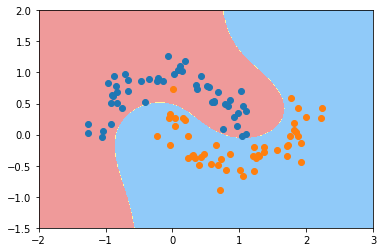

In [20]:
plot_decision_boundary(svc_poly,axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [21]:
### 改变超参数观察决策边界的变化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

svc_poly_2=Pipeline([
    ('poly',PolynomialFeatures(degree=10)),
    ('standard',StandardScaler()),
    ('svc',LinearSVC(C=1e3))    
])
svc_poly_2.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

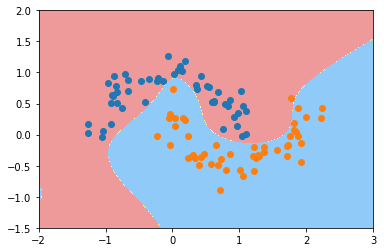

In [22]:
plot_decision_boundary(svc_poly_2,axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 直接使用sklearn中SVM提供的核函数进行训练

In [23]:
from sklearn.svm import SVC
def svm_classifier(degree,C,kernel):
    return Pipeline([
        ('standard',StandardScaler()),
        ('kernel_svm_classifier',SVC(kernel=kernel,degree=degree,C=C))
    ])

svm_cl=svm_classifier(5,1e5,'poly')
svm_cl.fit(X,y)

Pipeline(memory=None,
     steps=[('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernel_svm_classifier', SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

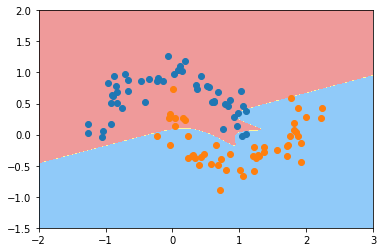

In [24]:
plot_decision_boundary(svm_cl,axis=[-2,3,-1.5,2])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 关于核函数的理解

- 核函数并非svm算法特有的
- kernel function 有些资料也称 kernel trick，解决线性不可分问题的本质是给每个样本添加新的特征（特征变多），这样样本空间就被映射到更高的维度，在更高的维度实现线性可分，就像上面我们为样本添加多项式特征后放入LinerSCV中实现非线性分类器一样，我们不使用核函数一样可以达到相同的效果。使用kernel function直接返回样本映射到高维空间后样本间点积的结果，可以节省内存空间，不用存储映射到高维的样本。
-下图中的K即为核函数
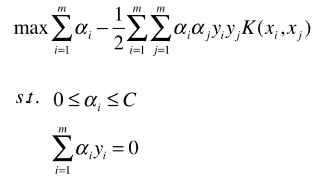

<img src="attachment:image.png" width="50%" height="50%" />

- 多项式核函数：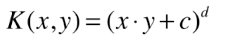

- 线性核函数：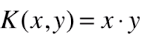（m*n--->m*m）

- 高斯函数和正态分布：
>高斯函数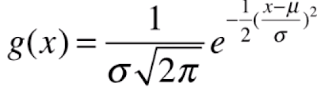


- 高斯核函数：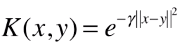

### 高斯核函数对数据的映射

-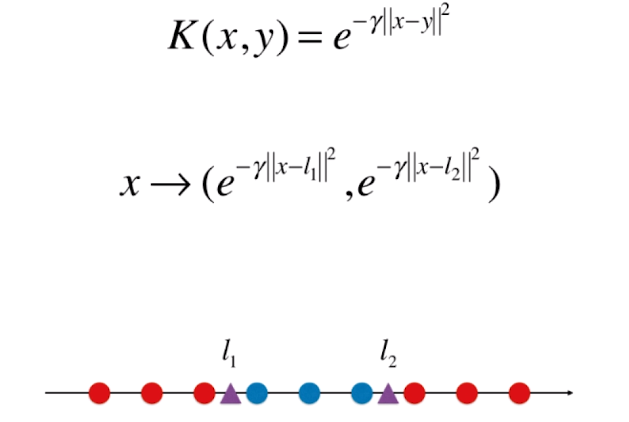

In [25]:
# 生成线性不可分的数据
x=np.arange(-4,5,1)
y= np.array((x>=-2)&(x<=2),dtype='int')

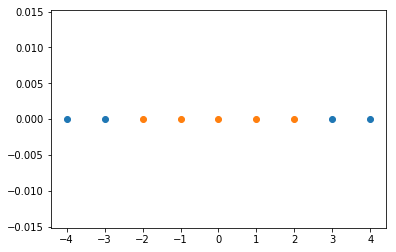

In [26]:
plt.scatter(x[y==0],[0]*len(x[y==0]))
plt.scatter(x[y==1],[0]*len(x[y==1]))
plt.show()

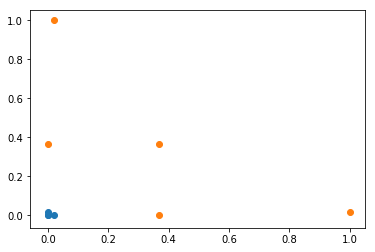

In [27]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)
    
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

#### 此时样本变的线性可分

## 使用scikit-learn中的SVM中的kernel function

In [28]:
from sklearn.svm import SVC

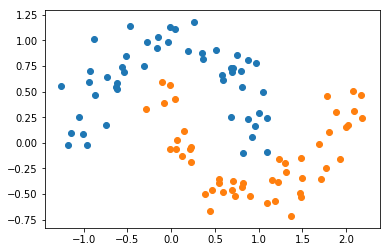

In [29]:
### 生成样本数据
X,y=datasets.make_moons(noise=0.15,random_state=2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [30]:
def construct_classifier(gamma):
    """构建分类器"""
    return Pipeline([
        ('standard',StandardScaler()),
        ('svm',SVC(kernel='rbf',gamma=gamma))
    ])

rbf_svm_classifrier=construct_classifier(gamma=1)
rbf_svm_classifrier.fit(X,y)

Pipeline(memory=None,
     steps=[('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

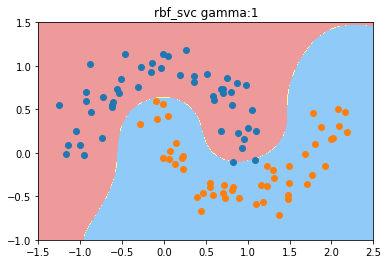

In [31]:
plot_decision_boundary(rbf_svm_classifrier,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.title('rbf_svc gamma:1')
plt.show()

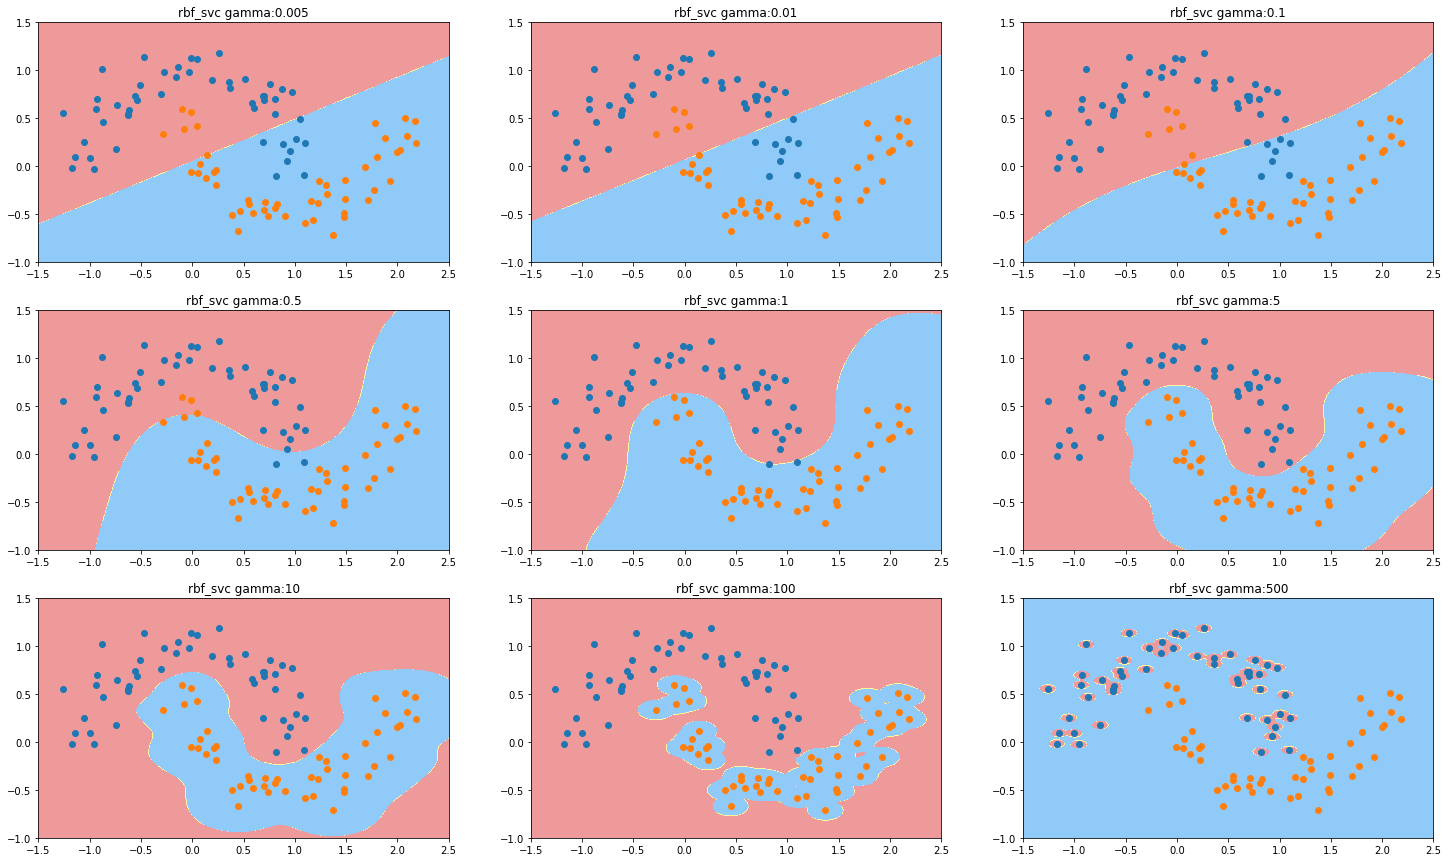

In [32]:
## 切换不同的gamma值，查看决策边界的变化,count_n=9
gammas=[0.005,0.01,0.1,0.5,1,5,10,100,500]
plt.figure(figsize=(25,15))
for i,spec_gam in enumerate(gammas):    
    rbf_svm_classifrier_specific_gamma=construct_classifier(gamma=spec_gam)
    rbf_svm_classifrier_specific_gamma.fit(X,y)
    plt.subplot(331+i)
    plot_decision_boundary(rbf_svm_classifrier_specific_gamma,axis=[-1.5, 2.5, -1.0, 1.5])
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])
    plt.title('rbf_svc gamma:{}'.format(spec_gam))
plt.show()

### 使用scikit-learn实现回归

#### svm解决回归问题的思路是：根据指定的epsilon的值找到一条带状区域，使其中的样本点最多。

In [33]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
boston_data=datasets.load_boston()
X,y=boston_data.data,boston_data.target

In [34]:
print X.shape,y.shape

(506L, 13L) (506L,)


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

#### 使用线性svr

In [36]:
def construct_regressor(epsilon=0.1):
    return Pipeline([
        ('standard',StandardScaler()),
        ('svr',LinearSVR(epsilon=epsilon))
    ])

In [37]:
svr=construct_regressor()
svr.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [38]:
svr.score(X_test,y_test)

0.76439165643369478

#### 使用线性svr的核函数

In [39]:
def construct_regressor(kernel,epsilon=0.2):
    return Pipeline([
        ('standard',StandardScaler()),
        ('svr',SVR(kernel=kernel,epsilon=epsilon))
    ])

In [40]:
svr=construct_regressor(kernel='rbf')
svr.fit(X_train,y_train)
svr.score(X_test,y_test)

0.58261243895758486